#### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve,cohen_kappa_score
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split,KFold
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

#### Reading the dataset

In [2]:
df= pd.read_excel("Election_Data.xlsx",sheet_name="Election_Dataset_Two Classes")

#### Displaying the first five records

In [3]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


#### Shape of the dataset

In [4]:
print("Shape: ", df.shape)
print("No. of rows:",df.shape[0], "\nNo. of colums:", df.shape[1])

Shape:  (1525, 10)
No. of rows: 1525 
No. of colums: 10


#### Dropping the insignificant column 'Unnamed: 0'

In [5]:
df=df.drop('Unnamed: 0',axis=1)

In [6]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


#### Copying the dataset for computations

In [7]:
data_df = df.copy()

# Exploratory Data Analysis

In [8]:
print("Shape: ", data_df.shape)
print("No. of rows:",data_df.shape[0], "\nNo. of colums:", data_df.shape[1])

Shape:  (1525, 9)
No. of rows: 1525 
No. of colums: 9


In [9]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [10]:
data_df.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [11]:
data_df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [12]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [13]:
for feature in data_df.columns:
    if data_df[feature].dtype=='object':
           print("\n", feature.upper() ," ",data_df[feature].nunique())
           print(data_df[feature].value_counts().sort_values(ascending = False))


 VOTE   2
Labour          1063
Conservative     462
Name: vote, dtype: int64

 GENDER   2
female    812
male      713
Name: gender, dtype: int64


## Let’s check the distribution of each column in the dataset

In [14]:
num_data = data_df.select_dtypes(include='number')

In [15]:
num_data.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
0,43,3,3,4,1,2,2
1,36,4,4,4,4,5,2
2,35,4,4,5,2,3,2
3,24,4,2,2,1,4,0
4,41,2,2,1,1,6,2


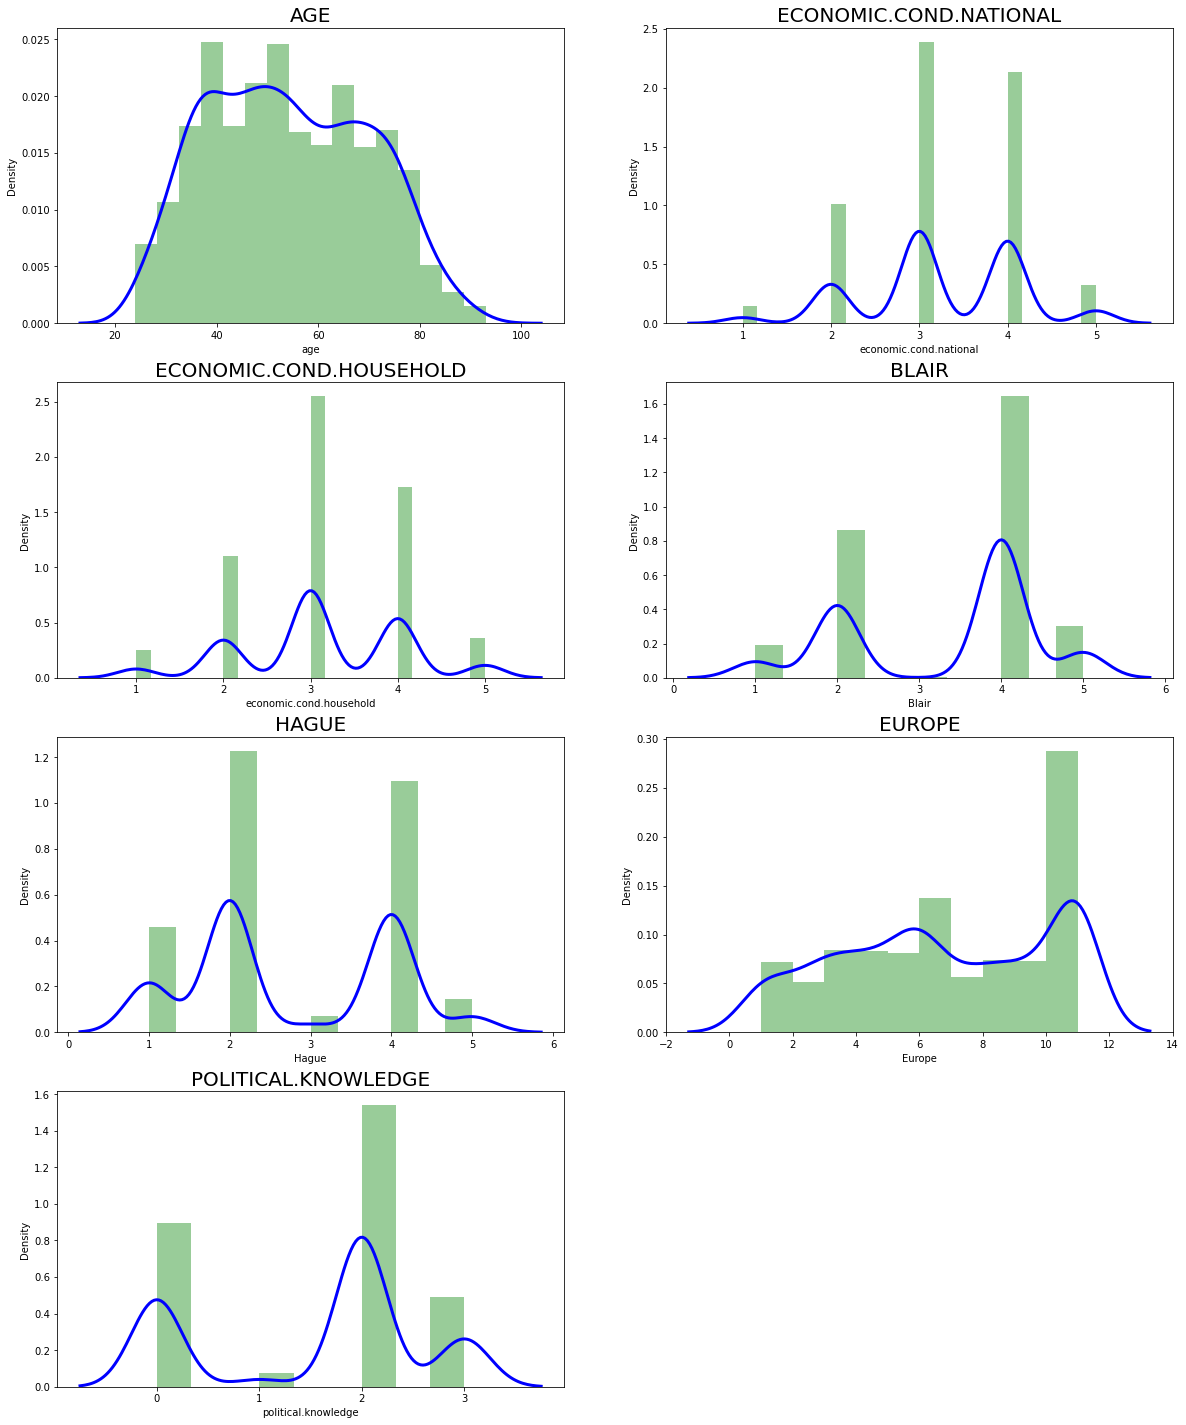

In [16]:
#Plot and Check the Distribution
#plt.figure(figsize=(12,6))
#for i in data_df.columns: 
    #if data_df[i].dtype == "int64":
        #sns.distplot(data_df[i],color="r")
       # plt.show()
        
plt.figure(figsize=(20,25))
for i,col in enumerate(num_data.columns):
    plt.subplot(4, 2, i+1)
    sns.distplot(df[col], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
    plt.title(col.upper(), fontsize=20)

plt.show()

## Let’s check the skewness of each column in the dataset

In [17]:
skew_data = pd.DataFrame()
skew_data['Features'] = [i for i in data_df.columns if data_df[i].dtype == "int64"]
skew_data['skewness'] = [data_df[i].skew() for i in data_df.columns if data_df[i].dtype == "int64"]
skew_data

,Features,skewness
0,age,0.144621
1,economic.cond.national,-0.240453
2,economic.cond.household,-0.149552
3,Blair,-0.535419
4,Hague,0.152100
5,Europe,-0.135947
6,political.knowledge,-0.426838


## Univariate Analysis

Text(0.5, 1.0, 'Household Economy boxplot')

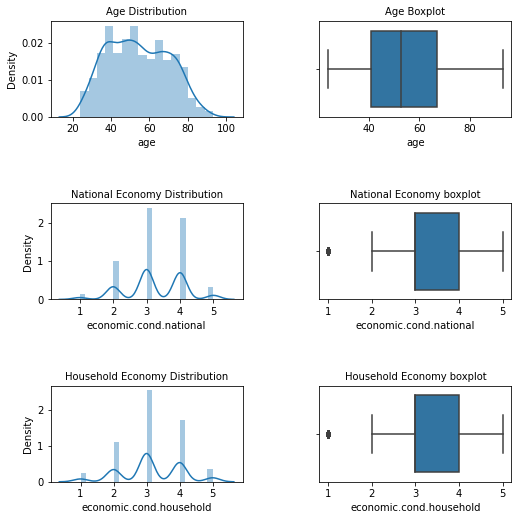

In [18]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(8,8)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.9)

a = sns.distplot(data_df['age'] , ax=axes[0][0])
a.set_title("Age Distribution",fontsize=10)

a = sns.boxplot(data_df['age'] , orient = "v" , ax=axes[0][1])
a.set_title("Age Boxplot",fontsize=10)

a=sns.distplot(data_df['economic.cond.national'], ax=axes[1][0])
a.set_title("National Economy Distribution",fontsize=10)

a=sns.boxplot(data_df['economic.cond.national'],orient="v", ax=axes[1][1])
a.set_title("National Economy boxplot", fontsize=10)

a=sns.distplot(data_df['economic.cond.household'], ax=axes[2][0])
a.set_title("Household Economy Distribution",fontsize=10)

a=sns.boxplot(data_df['economic.cond.household'],orient="v", ax=axes[2][1])
a.set_title("Household Economy boxplot", fontsize=10)

Text(0.5, 1.0, 'Political Knowledge Boxplot')

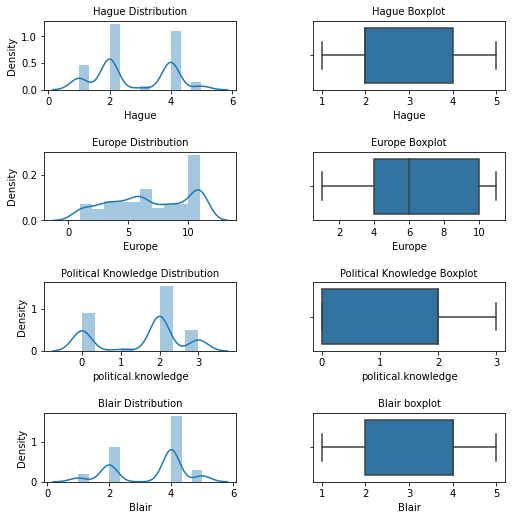

In [19]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(8,8)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.9)

a=sns.distplot(data_df['Blair'], ax=axes[3][0])
a.set_title("Blair Distribution",fontsize=10)

a=sns.boxplot(data_df['Blair'],orient="v", ax=axes[3][1])
a.set_title("Blair boxplot", fontsize=10)

a = sns.distplot(data_df['Hague'] , ax=axes[0][0])
a.set_title("Hague Distribution",fontsize=10)

a = sns.boxplot(data_df['Hague'] , orient = "v" , ax=axes[0][1])
a.set_title("Hague Boxplot",fontsize=10)

a=sns.distplot(data_df['Europe'], ax=axes[1][0])
a.set_title("Europe Distribution",fontsize=10)

a=sns.boxplot(data_df['Europe'],orient="v", ax=axes[1][1])
a.set_title("Europe Boxplot", fontsize=10)

a=sns.distplot(data_df['political.knowledge'], ax=axes[2][0])
a.set_title("Political Knowledge Distribution",fontsize=10)

a=sns.boxplot(data_df['political.knowledge'],orient="v", ax=axes[2][1])
a.set_title("Political Knowledge Boxplot", fontsize=10)

## Bivariate  Analysis

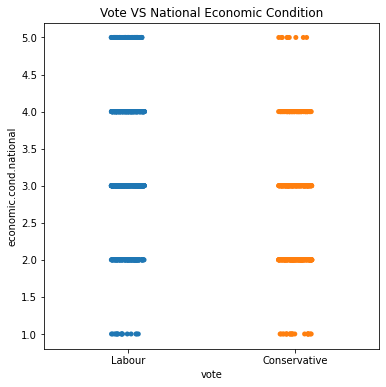

In [19]:
plt.figure(figsize=(6,6))
sns.stripplot(data_df["vote"], data_df['economic.cond.national'], jitter=True).set(title="Vote VS National Economic Condition") 
plt.show()

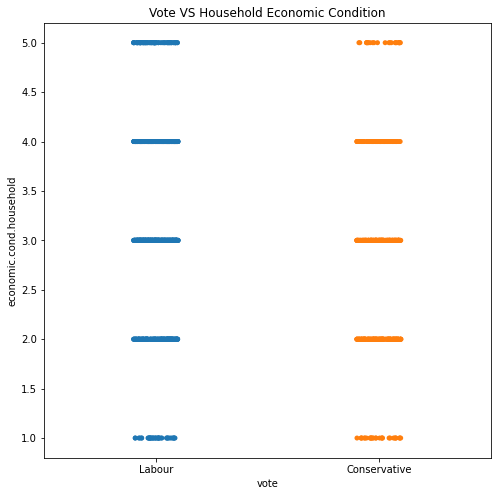

In [20]:
plt.figure(figsize=(8,8))
sns.stripplot(data_df["vote"], data_df['economic.cond.household'], jitter=True).set(title="Vote VS Household Economic Condition") 
plt.show()

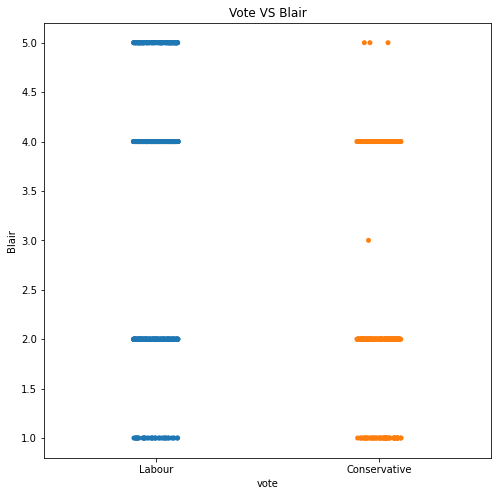

In [22]:
plt.figure(figsize=(8,8))
sns.stripplot(data_df["vote"], data_df['Blair'], jitter=True).set(title="Vote VS Blair") 
plt.show()

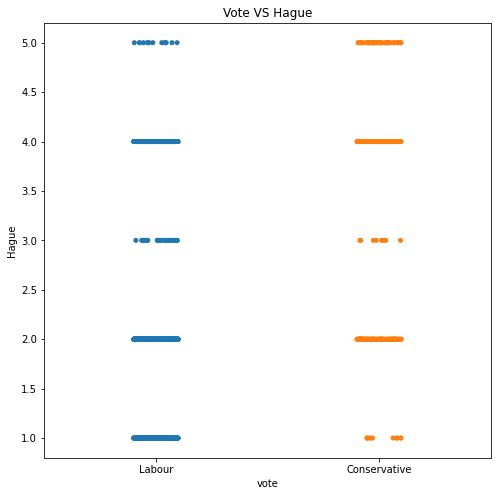

In [21]:
plt.figure(figsize=(8,8))
sns.stripplot(data_df["vote"], data_df['Hague'], jitter=True).set(title="Vote VS Hague")  
plt.show()

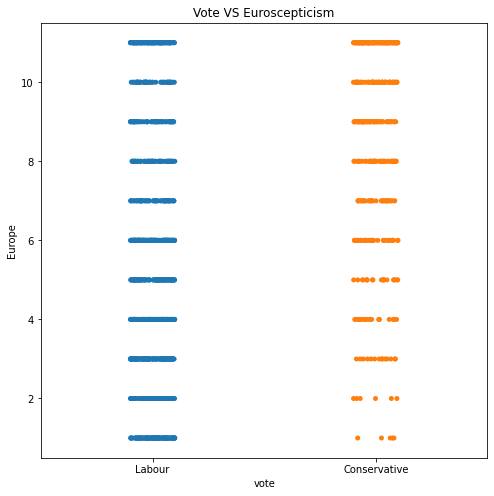

In [22]:
plt.figure(figsize=(8,8))
sns.stripplot(data_df["vote"], data_df['Europe'], jitter=True).set(title="Vote VS Euroscepticism")  
plt.show()

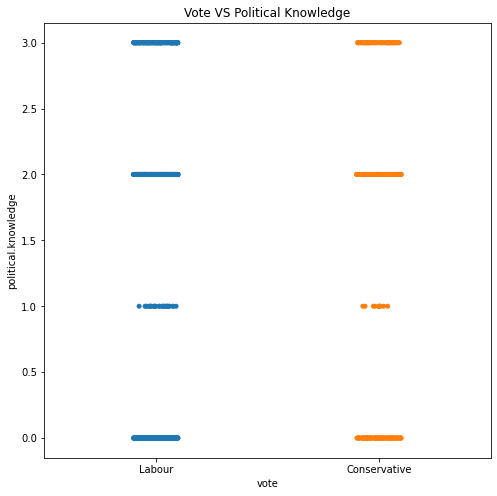

In [23]:
plt.figure(figsize=(8,8))
sns.stripplot(data_df["vote"], data_df['political.knowledge'], jitter=True).set(title="Vote VS Political Knowledge")   
plt.show()

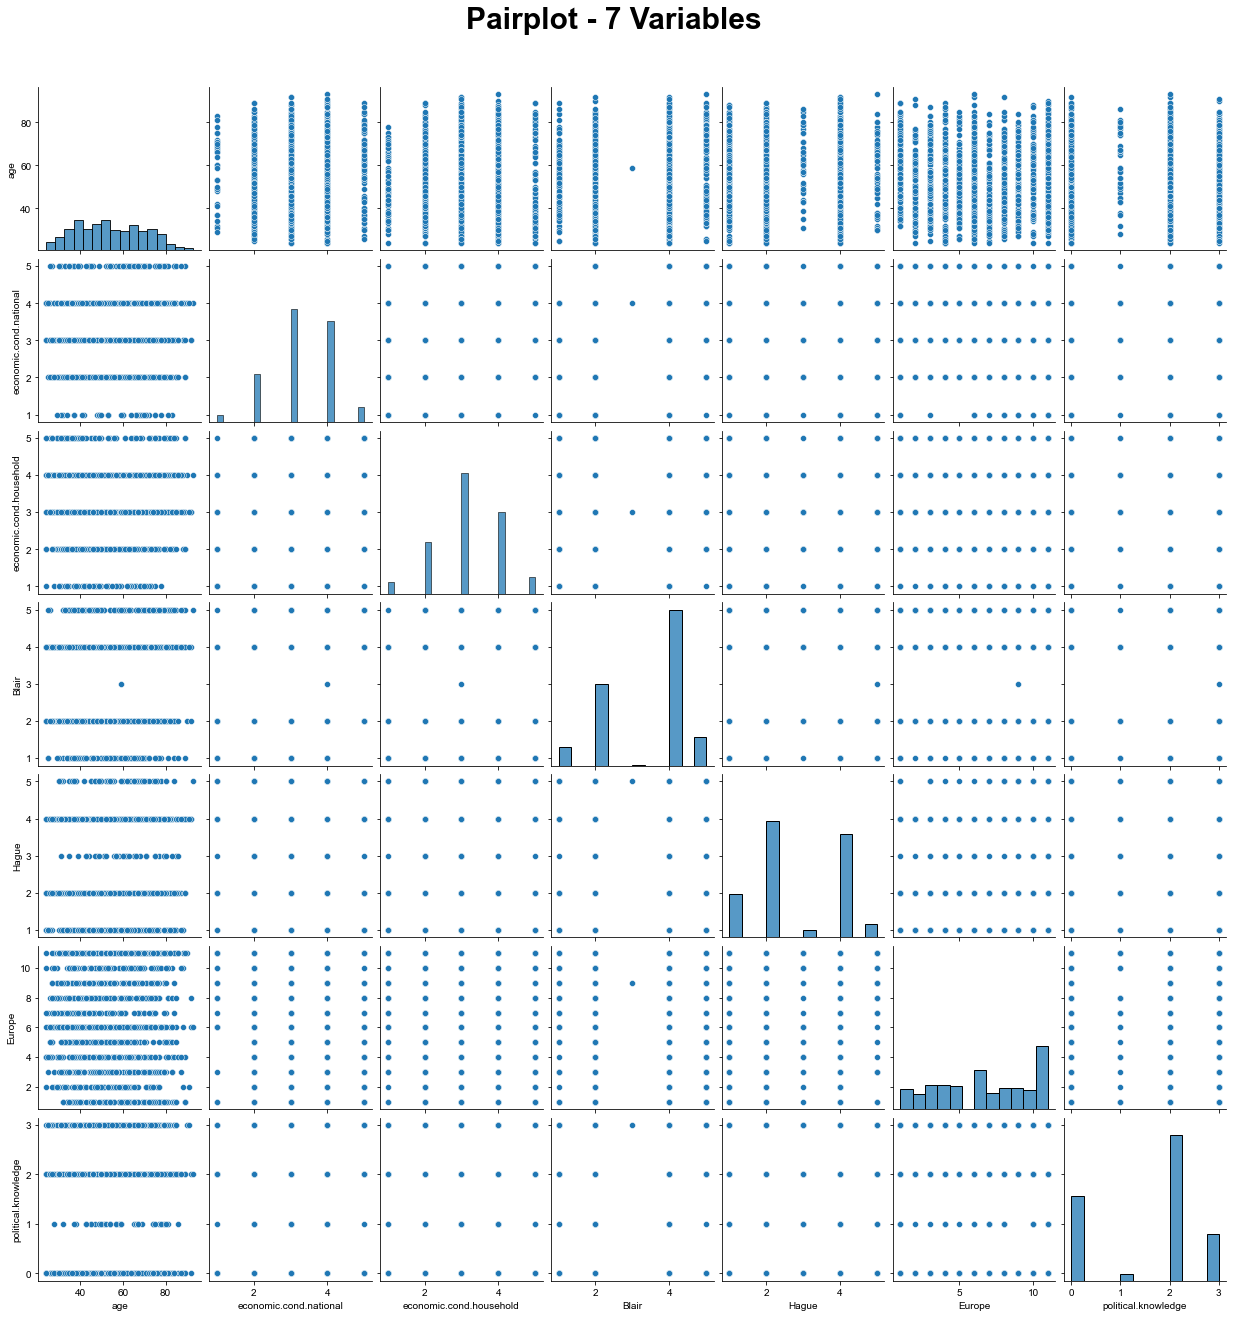

In [24]:
sns.pairplot(data_df).fig.suptitle("Pairplot - 7 Variables", y=1.05, weight = 'bold' ).set_fontsize(30)
sns.set(font_scale=1.13)

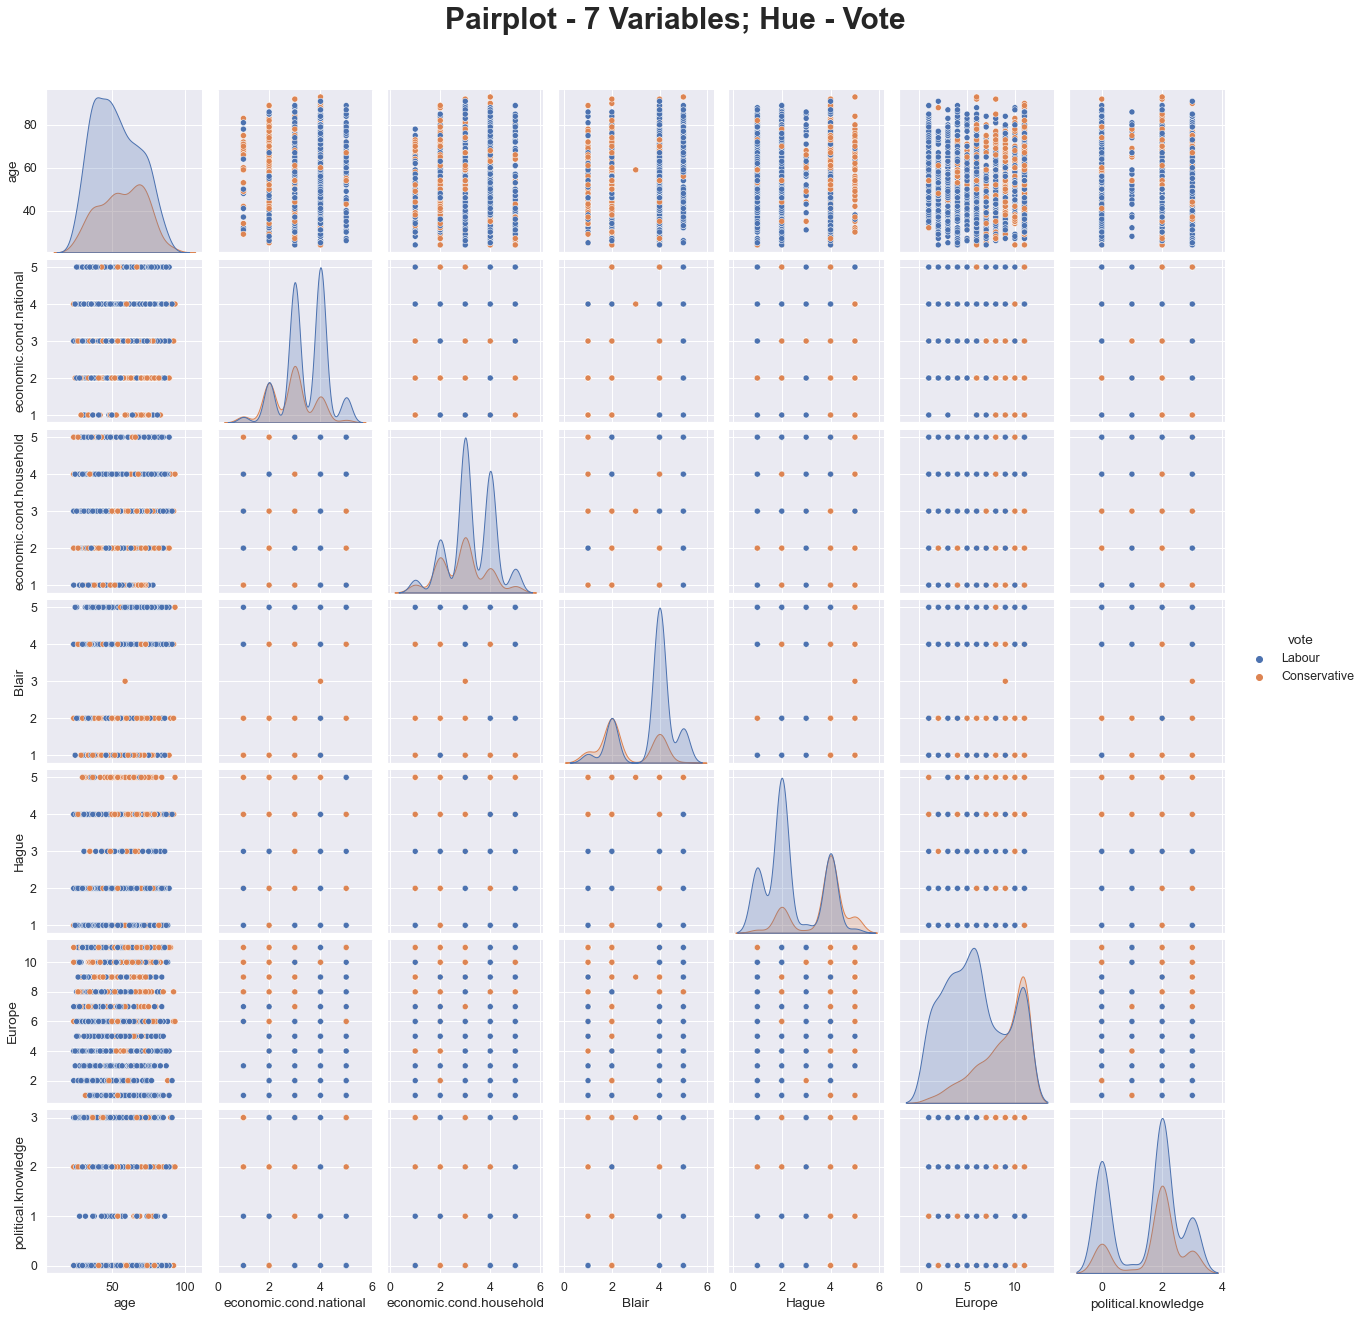

In [25]:
sns.pairplot(data_df, hue='vote').fig.suptitle("Pairplot - 7 Variables; Hue - Vote", y=1.05, weight = 'bold' ).set_fontsize(30)
sns.set(font_scale=1.13)

In [26]:
data_df['Hague'].value_counts()

2    624
4    558
1    233
5     73
3     37
Name: Hague, dtype: int64

In [27]:
data_df['Hague'].value_counts()

2    624
4    558
1    233
5     73
3     37
Name: Hague, dtype: int64

<AxesSubplot:title={'center':'Correlation Heatmap'}>

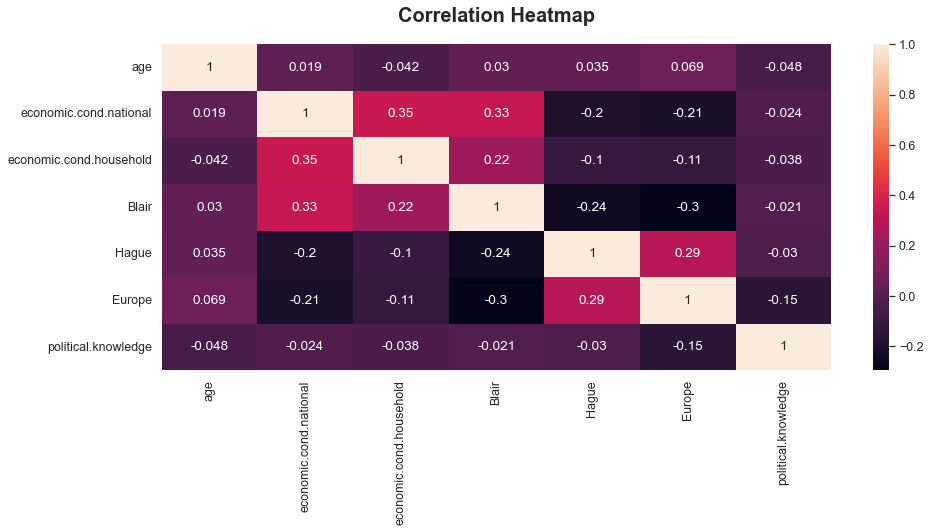

In [28]:
plt.figure(figsize=(15,6))
plt.title("Correlation Heatmap", fontsize = 20, weight = 'bold', y= 1.05)
sns.heatmap(data_df.corr(),annot=True)

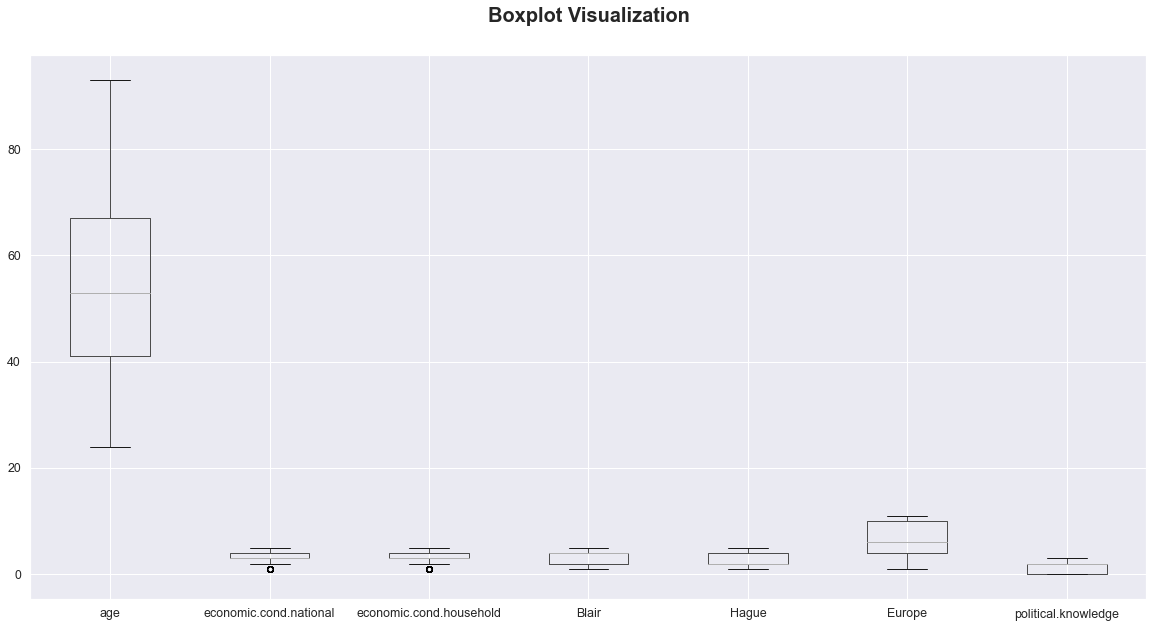

In [29]:
plt.figure(figsize=(20,10))
plt.title("Boxplot Visualization", fontsize = 20, weight = 'bold', y= 1.05)
data_df.boxplot()
plt.show()

# Data Preprocessing

## Encoding the Categorical Variable

In [30]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
data_df['vote']=lc.fit_transform(data_df['vote'])

In [31]:
data_df.vote.value_counts()

1    1063
0     462
Name: vote, dtype: int64

In [32]:
data_df['gender']=lc.fit_transform(data_df['gender'])

In [33]:
data_df.gender.value_counts()

0    812
1    713
Name: gender, dtype: int64

In [34]:
data_df.head(5)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


## Defining the Dependent and Independent variables

In [35]:
y = data_df['vote']
x = data_df.drop(['vote','gender'],axis=1)

In [36]:
x.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
0,43,3,3,4,1,2,2
1,36,4,4,4,4,5,2
2,35,4,4,5,2,3,2
3,24,4,2,2,1,4,0
4,41,2,2,1,1,6,2


## Scaling the Inuput Variables 

In [37]:
sc = StandardScaler()
xsc = sc.fit_transform(x)
xsc = pd.DataFrame(xsc,columns=x.columns)

In [38]:
xsc.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
0,-0.711973,-0.279218,-0.150948,0.566716,-1.419886,-1.434426,0.422643
1,-1.157661,0.856268,0.924730,0.566716,1.018544,-0.524358,0.422643
2,-1.221331,0.856268,0.924730,1.418187,-0.607076,-1.131070,0.422643
3,-1.921698,0.856268,-1.226625,-1.136225,-1.419886,-0.827714,-1.424148
4,-0.839313,-1.414704,-1.226625,-1.987695,-1.419886,-0.221002,0.422643


In [39]:
xsc.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1.525000e+03,1.525000e+03,1.525000e+03,1.525000e+03,1.525000e+03,1.525000e+03,1.525000e+03
mean,1.260922e-16,2.545141e-16,-4.551550e-16,4.322954e-16,-1.560864e-16,-3.619691e-16,-6.921968e-16
std,1.000328e+00,1.000328e+00,1.000328e+00,1.000328e+00,1.000328e+00,1.000328e+00,1.000328e+00
min,-1.921698e+00,-2.550189e+00,-2.302303e+00,-1.987695e+00,-1.419886e+00,-1.737782e+00,-1.424148e+00
25%,-8.393129e-01,-2.792178e-01,-1.509476e-01,-1.136225e+00,-6.070758e-01,-8.277143e-01,-1.424148e+00
50%,-7.527638e-02,-2.792178e-01,-1.509476e-01,5.667164e-01,-6.070758e-01,-2.210023e-01,4.226427e-01
75%,8.160995e-01,8.562679e-01,9.247302e-01,5.667164e-01,1.018544e+00,9.924217e-01,4.226427e-01
max,2.471512e+00,1.991754e+00,2.000408e+00,1.418187e+00,1.831354e+00,1.295778e+00,1.346038e+00


## Test for Multicollinearity

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
vif_data = pd.DataFrame()
vif_data["feature"] = xsc.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(xsc.values, i)
                          for i in range(len(xsc.columns))]
  
vif_data

,feature,VIF
0,age,1.012899
1,economic.cond.national,1.260413
2,economic.cond.household,1.156754
3,Blair,1.235226
4,Hague,1.137242
5,Europe,1.208810
6,political.knowledge,1.032923


There is no multicollinearity in the dataset. So, we are proceeding with the train-test split. 

## Splitting the Dataset into Sets of Training and Testing Data

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xsc,y, test_size=0.3, random_state=1)

In [43]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1067, 7), (458, 7), (1067,), (458,))

# Building the Models

## Decision Tree

In [44]:
DT = DecisionTreeClassifier()
DT_Model = DT.fit(x_train,y_train)
y_pred_DT = DT_Model.predict(x_test)

In [45]:
accuracy_score_DT = accuracy_score(y_test,y_pred_DT,normalize=True)

In [46]:
accuracy_score_DT

0.7489082969432315

In [47]:
score = []
score_std = []
split_array = []
for i in np.arange(2,11):
    score =[]
    for j in np.arange(0,15):
        model = KFold(n_splits=i, shuffle=True, random_state=10)
        roc = cross_val_score(DT,xsc,y,cv = model, scoring='f1_weighted')
        score.append(roc)
    split_array.append(i)
    score_std.append(np.std(score, ddof=1))
array_df = pd.DataFrame([split_array,score_std]).T
array_df.columns = ['Split Size','Std Dev']
array_df

,Split Size,Std Dev
0,2.0,0.007634
1,3.0,0.010712
2,4.0,0.016517
3,5.0,0.018458
4,6.0,0.016855
5,7.0,0.022005
6,8.0,0.025519
7,9.0,0.029230
8,10.0,0.021249


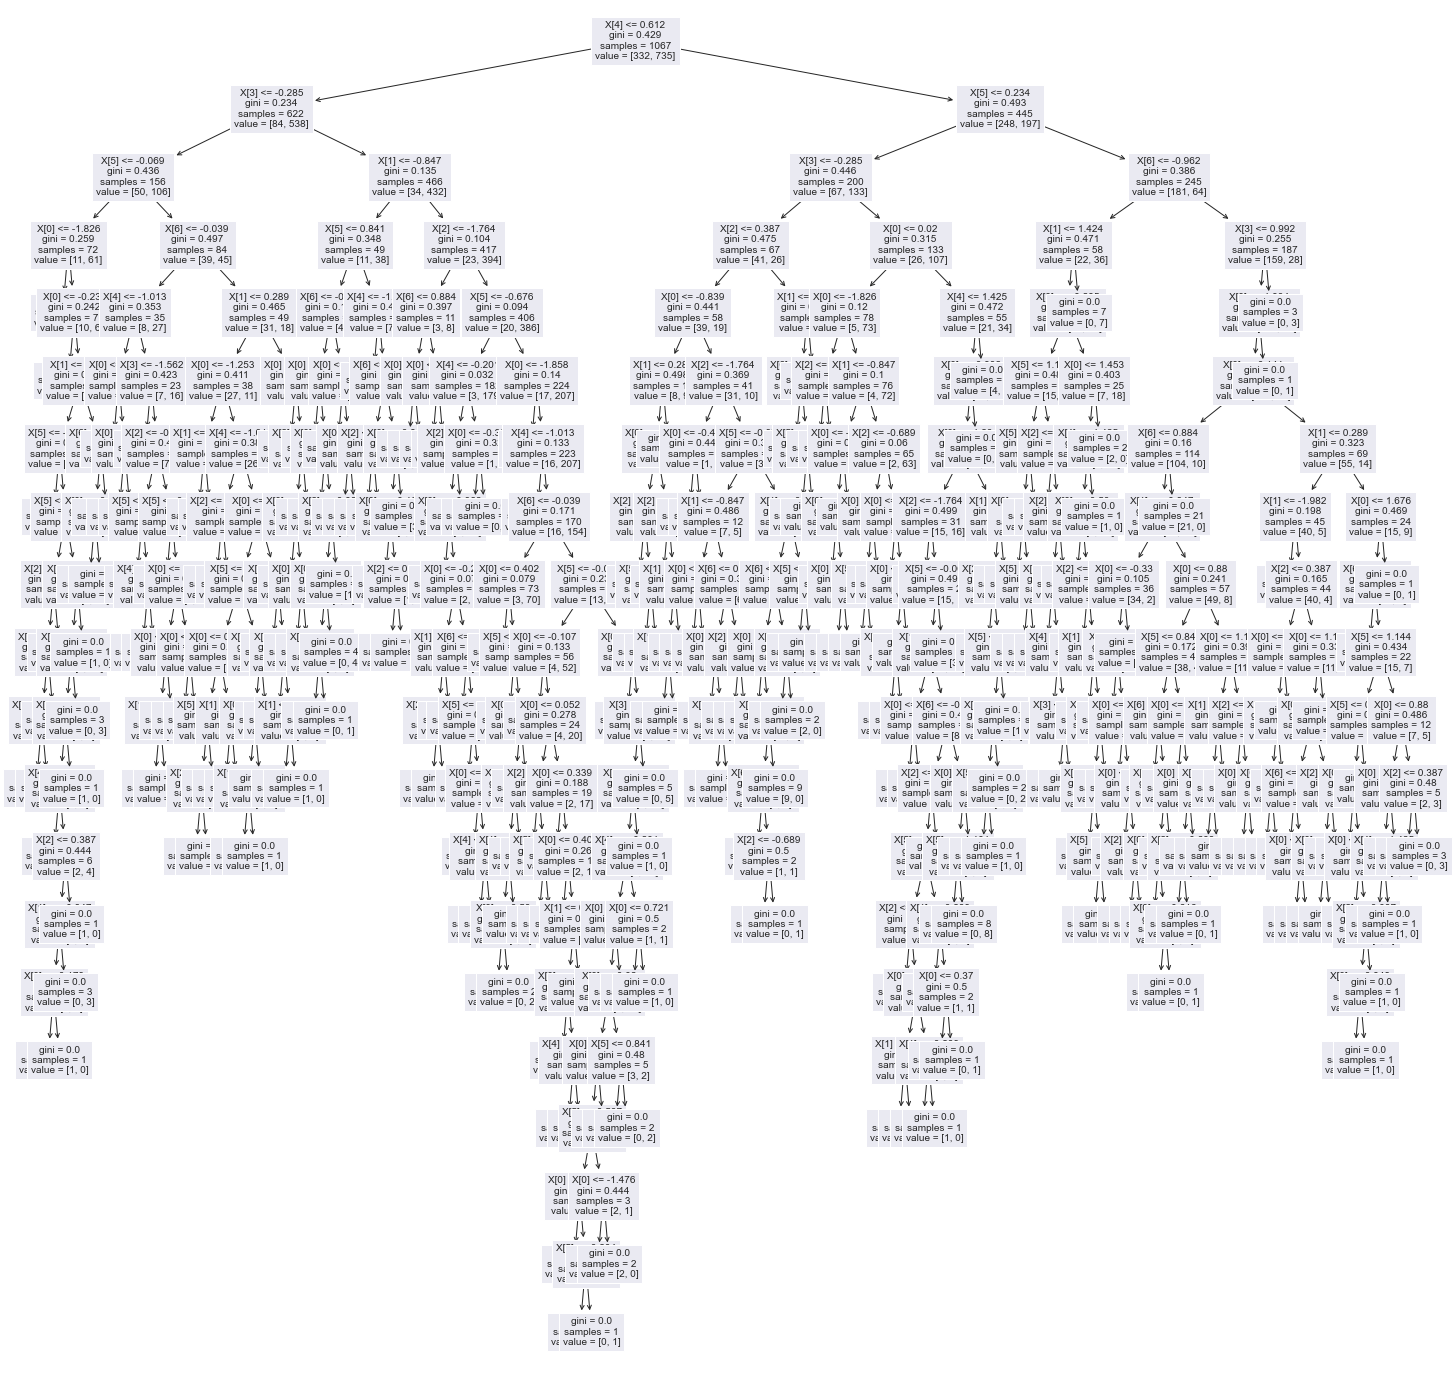

In [48]:
from sklearn import tree 
fig, ax = plt.subplots(figsize=(25, 25))
tree.plot_tree(DT_Model, fontsize=10)
plt.show()

In [49]:
params = {'max_depth':[3,4,5,6,7,8,9,10,11,12,13,14,15],
          'ccp_alpha': [0.1,0.01,0.001],
         'criterion':['gini','entropy']}
prune_DT = DecisionTreeClassifier(random_state=10)
grid_search = GridSearchCV(estimator=prune_DT,param_grid=params,cv=2,verbose=True)
grid_search.fit(x_train,y_train)

Fitting 2 folds for each of 78 candidates, totalling 156 fits


GridSearchCV(cv=2, estimator=DecisionTreeClassifier(random_state=10),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15]},
             verbose=True)

In [50]:
pruned_DT = DecisionTreeClassifier(max_depth=4,criterion='entropy',ccp_alpha=0.01,random_state=10)
pruned_model_DT = pruned_DT.fit(x_train,y_train)
y_pruned_pred = pruned_model_DT.predict(x_test)

In [51]:
accuracy_score_DT_pruned = accuracy_score(y_test,y_pruned_pred,normalize=True)
accuracy_score_DT_pruned

0.8056768558951966

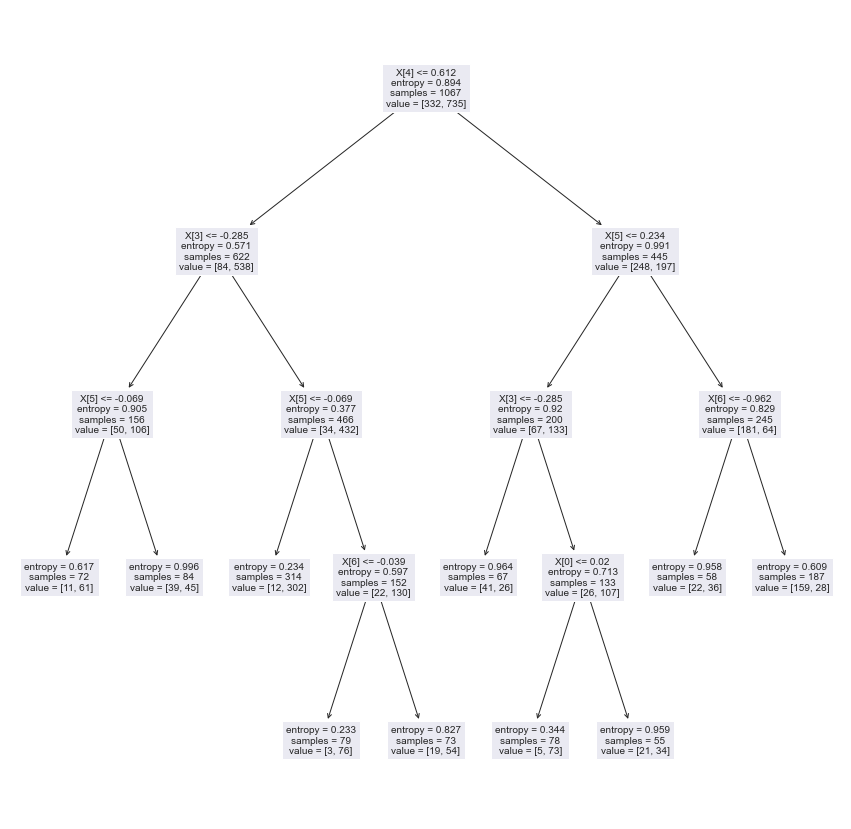

In [52]:
fig, ax = plt.subplots(figsize=(15, 15))
tree.plot_tree(pruned_model_DT, fontsize=10)
plt.show()

## Random Forest

In [53]:
RF = RandomForestClassifier()
RF_model = RF.fit(x_train,y_train)
y_pred_RF = RF_model.predict(x_test)

In [54]:
accuracy_score_RF = accuracy_score(y_test,y_pred_RF)
accuracy_score_RF

0.8165938864628821

In [55]:
cm_rf = confusion_matrix(y_test,y_pred_RF)
cm_rf

array([[ 86,  44],
       [ 40, 288]], dtype=int64)

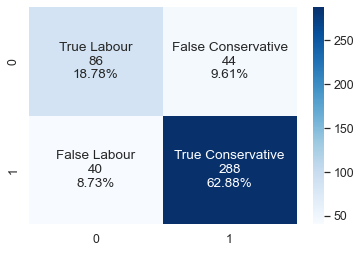

In [56]:
group_names = ['True Labour','False Conservative','False Labour','True Conservative']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_rf.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_rf.flatten()/np.sum(cm_rf)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cm_rf, annot=labels, fmt='', cmap='Blues')

In [62]:
cr_rf = classification_report(y_test,y_pred_RF)
print(cr_rf)

              precision    recall  f1-score   support

           0       0.68      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.81      0.82      0.82       458



In [63]:
score = []
score_std = []
split_array = []
for i in np.arange(2,11):
    score =[]
    for j in np.arange(0,15):
        model = KFold(n_splits=i, shuffle=True, random_state=10)
        roc = cross_val_score(RF,xsc,y,cv = model, scoring='f1_weighted')
        score.append(roc)
    split_array.append(i)
    score_std.append(np.std(score, ddof=1))
array_df = pd.DataFrame([split_array,score_std]).T
array_df.columns = ['Split Size','Std Dev']
array_df

,Split Size,Std Dev
0,2.0,0.008281
1,3.0,0.010416
2,4.0,0.007646
3,5.0,0.024028
4,6.0,0.022645
5,7.0,0.022349
6,8.0,0.024128
7,9.0,0.031347
8,10.0,0.029587


In [64]:
RF_var_eror_entropy = []
RF_bias_error_entropy =[]

RF_var_error_gini = []
RF_bias_error_gini = []

for i in np.arange(1,100):
  for criteria in ['entropy','gini']:
    model = RandomForestClassifier(n_estimators=i,criterion=criteria,random_state=10)
    kf = KFold(n_splits=2,shuffle=True,random_state=10)
    score = cross_val_score(model,xsc,y,cv=kf,scoring='f1_weighted')

    if criteria == 'entropy':
      RF_bias_error_entropy.append(np.mean(1-score))
      RF_var_eror_entropy.append(np.std(score , ddof=1))
    else:
      RF_bias_error_gini.append(np.mean(1-score))
      RF_var_error_gini.append(np.std(score, ddof=1))

In [65]:
print(np.min(RF_var_eror_entropy),np.argmin(RF_var_eror_entropy))
print(np.min(RF_var_error_gini),np.argmin(RF_var_error_gini))

6.299935644114156e-05 12
0.00013005907295300689 31


In [66]:
#Boosting 
ada_boost = AdaBoostClassifier(base_estimator=RF,n_estimators=100,learning_rate=0.3,random_state=10)
ada_boost_model = ada_boost.fit(x_train,y_train)
y_pred_ada_boost =ada_boost_model.predict(x_test)

In [67]:
print("Accuracy score : ", accuracy_score(y_test,y_pred_ada_boost))

Accuracy score :  0.8253275109170306


In [68]:
cm_rf_ada = confusion_matrix(y_test,y_pred_ada_boost)
cm_rf_ada

array([[ 86,  44],
       [ 36, 292]], dtype=int64)

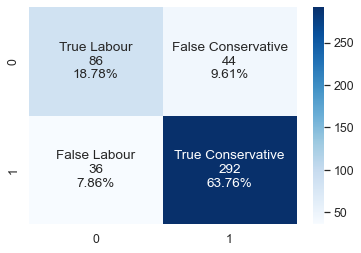

In [69]:
group_names = ['True Labour','False Conservative','False Labour','True Conservative']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_rf_ada.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_rf_ada.flatten()/np.sum(cm_rf_ada)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cm_rf_ada, annot=labels, fmt='', cmap='Blues')

In [70]:
cr_rf_ada = classification_report(y_test,y_pred_ada_boost)
print(cr_rf_ada)

              precision    recall  f1-score   support

           0       0.70      0.66      0.68       130
           1       0.87      0.89      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.78      0.78       458
weighted avg       0.82      0.83      0.82       458



## Logistic Regression 

In [71]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [72]:
logreg_y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.83


In [73]:
confusion_matrix = confusion_matrix(y_test, logreg_y_pred)
print(confusion_matrix)

[[ 88  42]
 [ 36 292]]


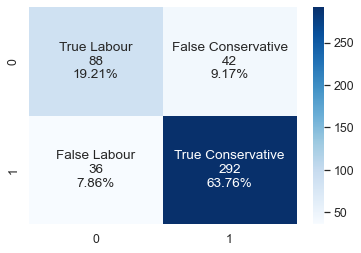

In [74]:
group_names = ['True Labour','False Conservative','False Labour','True Conservative']

group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')


In [75]:
print(classification_report(y_test, logreg_y_pred))

              precision    recall  f1-score   support

           0       0.71      0.68      0.69       130
           1       0.87      0.89      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.78      0.79       458
weighted avg       0.83      0.83      0.83       458



### ROC Curve 

0.7835834896810507


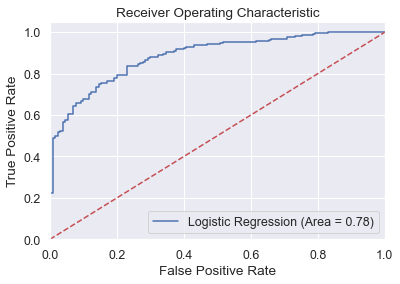

In [87]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (Area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## KNN

In [77]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier()
KNN_model.fit(x_train,y_train)

KNeighborsClassifier()

In [78]:
y_pred=KNN_model.predict(x_test)
KNN_model_score=KNN_model.score(x_test, y_test)
print(KNN_model_score)

0.8187772925764192


In [79]:
cm_knn = metrics.confusion_matrix(y_test,y_pred)
cm_knn

array([[ 91,  39],
       [ 44, 284]], dtype=int64)

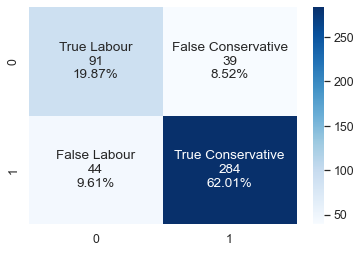

In [80]:
group_names = ['True Labour','False Conservative','False Labour','True Conservative']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_knn.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_knn.flatten()/np.sum(cm_knn)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cm_knn, annot=labels, fmt='', cmap='Blues')


In [81]:
cr_knn = metrics.classification_report(y_test,y_pred)
print(cr_knn)

              precision    recall  f1-score   support

           0       0.67      0.70      0.69       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



## AUC ROC Curve KNN Test 

the auc curve 0.854 


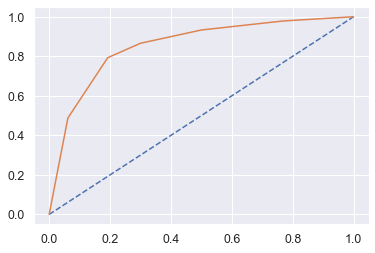

In [82]:
probs_test=KNN_model.predict_proba(x_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

In [85]:
ac_score=[]

for k in range(1,20,2):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    scores=knn.score(x_test,y_test)
    ac_score.append(scores)
    
MCE=[1-x for x in ac_score]
MCE

[0.2379912663755459,
 0.1834061135371179,
 0.18122270742358082,
 0.16812227074235808,
 0.18122270742358082,
 0.18122270742358082,
 0.18122270742358082,
 0.1746724890829694,
 0.17903930131004364,
 0.17903930131004364]